# Happiness and Freedom of Movement

* Freedom is positively correlated with Happiness.
* People in land-locked countries are less happy than others considering all other factors.
* People in countries with reduced religious freedom and women's moveement are less happy than others.


In [1]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlalchemy as sa

# create sqlite database and path

from sqlalchemy import create_engine
engine = create_engine('sqlite:///Happiness_Freedom.db')

# code for multiple outputs from single cell (ref: https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs?noredirect=1&lq=1)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
# create dataframe from csv

hfi_file = pd.read_csv("hfi_cc_2018.csv")

whr_file = pd.read_csv("whr_2017.csv")

hfi = pd.DataFrame(hfi_file)

whr = pd.DataFrame(whr_file)

# create database and tables from dataframe (database and table have been previously created using this code)

# hfi.to_sql("Human Freedom Index", con=engine)
# whr.to_sql("World Happiness Report", con=engine)

# pull data from database to confirm successful creation

hfi_select_first_five = "SELECT * FROM 'Human Freedom Index' LIMIT 5"

whr_select_first_five = "SELECT * FROM 'World Happiness Report' LIMIT 5"

# pd.read_sql provides better formatting

pd.read_sql(hfi_select_first_five, con=engine)

pd.read_sql(whr_select_first_five, con=engine)

,index,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0


,index,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [3]:
# get basic info about hfi dataframe

hfi.info()

hfi.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Columns: 123 entries, year to hf_quartile
dtypes: float64(119), int64(1), object(3)
memory usage: 1.4+ MB


,year,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
count,1458.000000,880.000000,880.000000,880.000000,1378.000000,1378.000000,1369.000000,1378.000000,1279.000000,1378.000000,...,1283.000000,1357.000000,1368.000000,1374.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,2012.000000,5.589355,5.474770,5.044070,5.309641,7.412980,8.341855,9.519458,6.772869,9.584972,...,4.886192,7.698494,6.981858,6.317668,7.019782,6.785610,76.973149,6.993444,77.007983,2.490566
std,2.582875,2.080957,1.428494,1.724886,1.529310,2.832947,3.225902,1.744673,2.768983,1.559826,...,1.889168,1.728507,1.979200,1.230988,1.027625,0.883601,44.540142,1.025811,44.506549,1.119698
min,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.009841,2.483540,2.880000,1.000000,3.765827,1.000000,1.000000
25%,2010.000000,4.133333,4.549550,3.789724,4.131746,6.386978,10.000000,10.000000,5.000000,9.942607,...,3.433786,6.874687,6.368178,5.591851,6.429498,6.250000,38.000000,6.336685,39.000000,1.000000
50%,2012.000000,5.300000,5.300000,4.575189,4.910797,8.638278,10.000000,10.000000,7.500000,10.000000,...,4.418371,8.074161,7.466692,6.265234,7.082075,6.900000,77.000000,6.923840,76.000000,2.000000
75%,2014.000000,7.389499,6.410975,6.400000,6.513178,9.454402,10.000000,10.000000,10.000000,10.000000,...,6.227978,8.991882,8.209310,7.139718,7.720955,7.410000,115.000000,7.894660,115.000000,3.000000
max,2016.000000,9.700000,8.773533,8.719848,8.723094,9.926568,10.000000,10.000000,10.000000,10.000000,...,9.623811,9.999638,9.865488,9.272600,9.439828,9.190000,162.000000,9.126313,162.000000,4.000000


In [25]:
# find out if any columns in the dataframe have null values

pd.isnull(hfi).any()

year                                  False
ISO_code                              False
countries                             False
region                                False
pf_rol_procedural                      True
pf_rol_civil                           True
pf_rol_criminal                        True
pf_rol                                 True
pf_ss_homicide                         True
pf_ss_disappearances_disap             True
pf_ss_disappearances_violent           True
pf_ss_disappearances_organized         True
pf_ss_disappearances_fatalities        True
pf_ss_disappearances_injuries          True
pf_ss_disappearances                   True
pf_ss_women_fgm                        True
pf_ss_women_missing                    True
pf_ss_women_inheritance_widows         True
pf_ss_women_inheritance_daughters      True
pf_ss_women_inheritance                True
pf_ss_women                            True
pf_ss                                  True
pf_movement_domestic            

In [5]:
# fill missing data values with mean 

hfi_movement = hfi["pf_movement"].dropna()

hfi_total_score = hfi["hf_score"].dropna()

hfi_women_movement = hfi["pf_movement_women"].dropna()

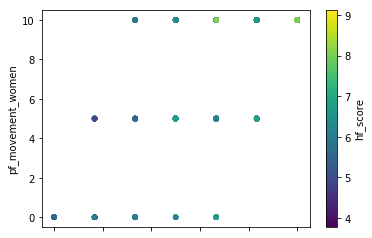

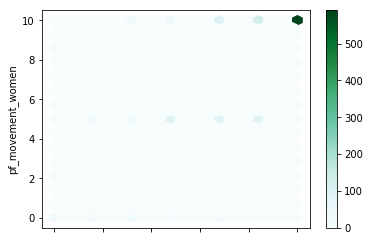

In [68]:
# examine correlation between freedome of movement and women's freedom of movement colored by the country's human freedome score over all countries

hfi.plot.scatter(x="pf_movement", y="pf_movement_women", c="hf_score", colormap=("viridis"))

# same as above in hexbin

hfi.plot.hexbin(x='pf_movement', y='pf_movement_women', gridsize=25)

Text(0.5,0,'Human Freedom')

Text(0,0.5,'Economic Freedom')

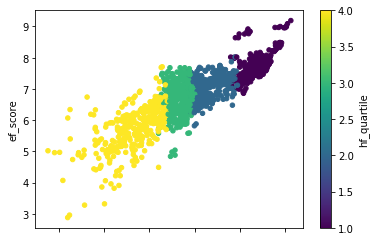

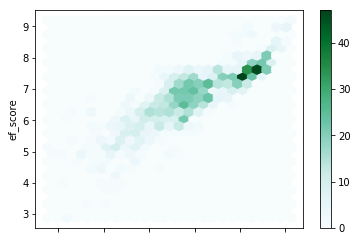

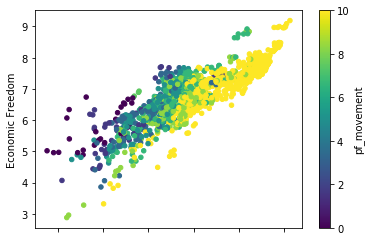

In [76]:
# examine correlation between human freedom score and economic freedom score


# colored by human freedom quartile (higher being lower value quartile)
hfi.plot(kind="scatter", x="hf_score", y="ef_score", c="hf_quartile", cmap="viridis")

# same as above in hexbin format
hfi.plot.hexbin(x='hf_score', y='ef_score', gridsize=25)

# colored by personal freedom of movement score
hfi.plot(kind="scatter", x="hf_score", y="ef_score", c="pf_movement", cmap="viridis")

# label each axis (bug: x label does not display)
plt.xlabel("Human Freedom")
plt.ylabel("Economic Freedom")

Text(0.5,0,'Human Freedom')

Text(0,0.5,'Economic Freedom')

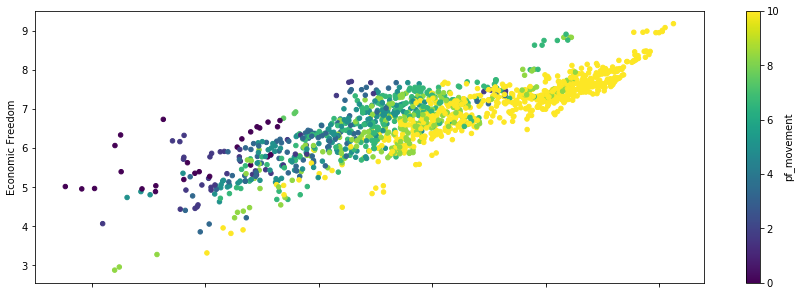

In [51]:
# inidividual examination of human freedom and economic freedome colored by personal freedome of movement

hfi.plot(kind="scatter", x="hf_score", y="ef_score", c="pf_movement", cmap="viridis", figsize=(15,5))
plt.xlabel("Human Freedom")
plt.ylabel("Economic Freedom")

Text(0.5,0,'Human Freedom')

Text(0,0.5,'Economic Freedom')

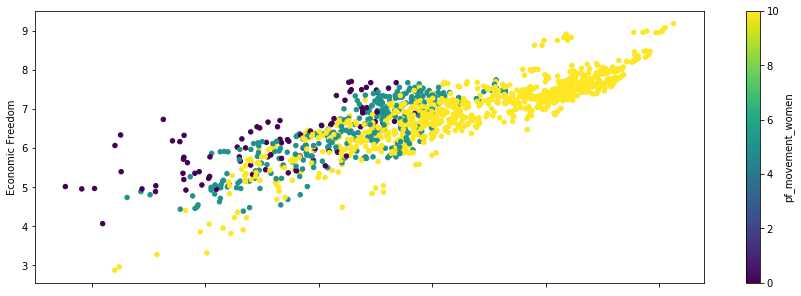

In [52]:
# examination as above but colored by women's personal freedome of movement (similar correlation)

hfi.plot(kind="scatter", x="hf_score", y="ef_score", c="pf_movement_women", cmap="viridis", figsize=(15,5))
plt.xlabel("Human Freedom")
plt.ylabel("Economic Freedom")

hf_score                                                            \
             count     mean std      min      25%      50%      75%      max   
countries                                                                      
Albania        1.0  7.56814 NaN  7.56814  7.56814  7.56814  7.56814  7.56814   

          pf_movement           ...                      pf_movement_women  \
                count      mean ...        75%       max             count   
countries                       ...                                          
Albania           1.0  6.666667 ...   6.666667  6.666667               1.0   

                                             
          mean std  min  25%  50%  75%  max  
countries                                    
Albania    5.0 NaN  5.0  5.0  5.0  5.0  5.0  

[1 rows x 24 columns]

countries
Albania    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

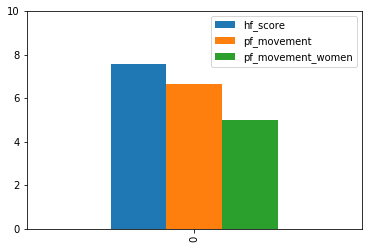

In [7]:
# bar chart of movement and overall freedom scores for Albania

albania = hfi.head(1).groupby("countries")["hf_score", "pf_movement", "pf_movement_women"]

albania.describe()

albania.plot(kind="bar", xlim=(0,10), ylim=(0,10))

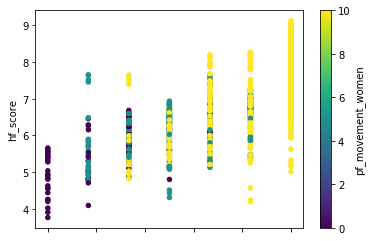

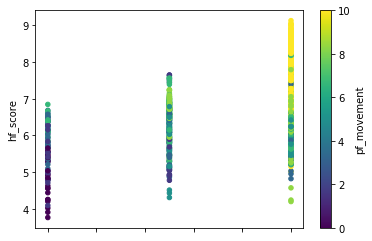

In [81]:
# visualize correlation between movement freedom and overall freedom colored by women's personal freedom of movmeent

hfi.plot(kind="scatter", x="pf_movement", y="hf_score", c="pf_movement_women", cmap="viridis")

# visualize correlation between womens' movement freedom and overall freedom

hfi.plot(kind="scatter", x="pf_movement_women", y="hf_score", c="pf_movement", cmap="viridis")

In [9]:
# get list of land locked countries

land_locked_countries = pd.Series(["Afghanistan", "Andorra", "Armenia", "Artsakh", "Austria", "Azerbaijan", "Belarus", "Bhutan", "Bolivia", "Botswana", "Burkina Faso", "Burundi", "Central African Republic", "Chad", "Czech Republic", "Ethiopia", "Hungary","Kazakhstan", "Kosovo", "Kyrgyzstan", "Laos", "Lesotho", "Liechtenstein", "Luxembourg", "Macedonia", "Malawi", "Mali", "Moldova", "Mongolia", "Nepal", "Niger", "Paraguay", "Rwanda", "San Marino" , "Serbia", "Slovakia", "South Ossetia", "South Sudan", "Swaziland", "Switzerland","Tajikistan", "Transnistria", "Turkmenistan", "Uganda", "Uzbekistan","Vatican City", "West Bank", "Zambia", "Zimbabwe"])
land_locked_countries.head()

0    Afghanistan
1        Andorra
2        Armenia
3        Artsakh
4        Austria
dtype: object

In [10]:
# list non land locked countries

nll_happiness = hfi.loc[~hfi["countries"].isin(land_locked_countries)]

nll_rank = nll_happiness.groupby("countries")["pf_movement"]

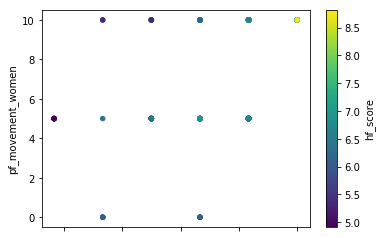

In [82]:
# select only land locked countries from dataframe (ref: https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas)

land_locked_happiness = hfi.loc[hfi['countries'].isin(land_locked_countries)]

# land_locked_happiness.describe()

# list land locked countries by movement freedom rank

llc_rank = land_locked_happiness.groupby("countries")[["pf_movement"]].mean()

# llc_rank.sort_values("pf_movement", ascending=False)

land_locked_happiness.plot(kind="scatter", x="pf_movement", y="pf_movement_women", c="hf_score", cmap="viridis")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000275BD9E1668>]],
      dtype=object)

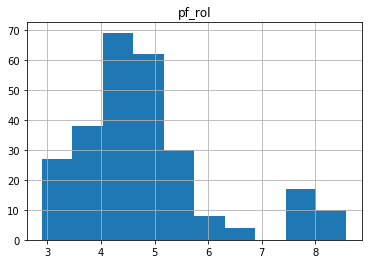

In [12]:
land_locked_happiness.hist(column="pf_rol")

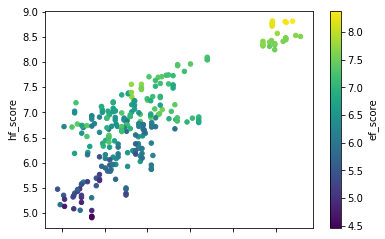

In [83]:
land_locked_happiness.plot(x="pf_rol", y="hf_score", kind="scatter", c="ef_score", cmap="viridis")